In [4]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('rolling_stones_spotify.csv')
data.head()

Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness    tempo  valence  popularity  duration_ms  
0       0.1100  118.001   0.0302          33        48640  
1       0.0759  131.455   0.3180          34       253173  
2       0.1150  130.066   0.3130          34       263160  
3       0.1930  132.994   0.1470          32       305880  
4       0.0930  130.533   0.2060          32       305106

Checking for duplicates

In [5]:
duplicates = data.duplicated().sum()
print("Duplicates in the data:", duplicates)

Duplicates in the data: 0


Checking for missing values

In [6]:
missing_values = data.isnull().sum()
print("\nMissing values in the data:\n", missing_values)


Missing values in the data:
 Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64


Check for irrelevant entries

In [7]:
numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms']
data[numerical_features].describe()

acousticness  danceability       energy  instrumentalness    liveness  \
count   1610.000000   1610.000000  1610.000000       1610.000000  1610.00000   
mean       0.250475      0.468860     0.792352          0.164170     0.49173   
std        0.227397      0.141775     0.179886          0.276249     0.34910   
min        0.000009      0.104000     0.141000          0.000000     0.02190   
25%        0.058350      0.362250     0.674000          0.000219     0.15300   
50%        0.183000      0.458000     0.848500          0.013750     0.37950   
75%        0.403750      0.578000     0.945000          0.179000     0.89375   
max        0.994000      0.887000     0.999000          0.996000     0.99800   

          loudness  speechiness        tempo      valence   popularity  \
count  1610.000000  1610.000000  1610.000000  1610.000000  1610.000000   
mean     -6.971615     0.069512   126.082033     0.582165    20.788199   
std       2.994003     0.051631    29.233483     0.231253    12.426859   
min     -24.408000     0.023200    46.525000     0.000000     0.000000   
25%      -8.982500     0.036500   107.390750     0.404250    13.000000   
50%      -6.523000     0.051200   124.404500     0.583000    20.000000   
75%      -4.608750     0.086600   142.355750     0.778000    27.000000   
max      -1.014000     0.624000   216.304000     0.974000    80.000000   

         duration_ms  
count    1610.000000  
mean   257736.488199  
std    108333.474920  
min     21000.000000  
25%    190613.000000  
50%    243093.000000  
75%    295319.750000  
max    981866.000000

Visualize distributions of numerical features to detect outliers

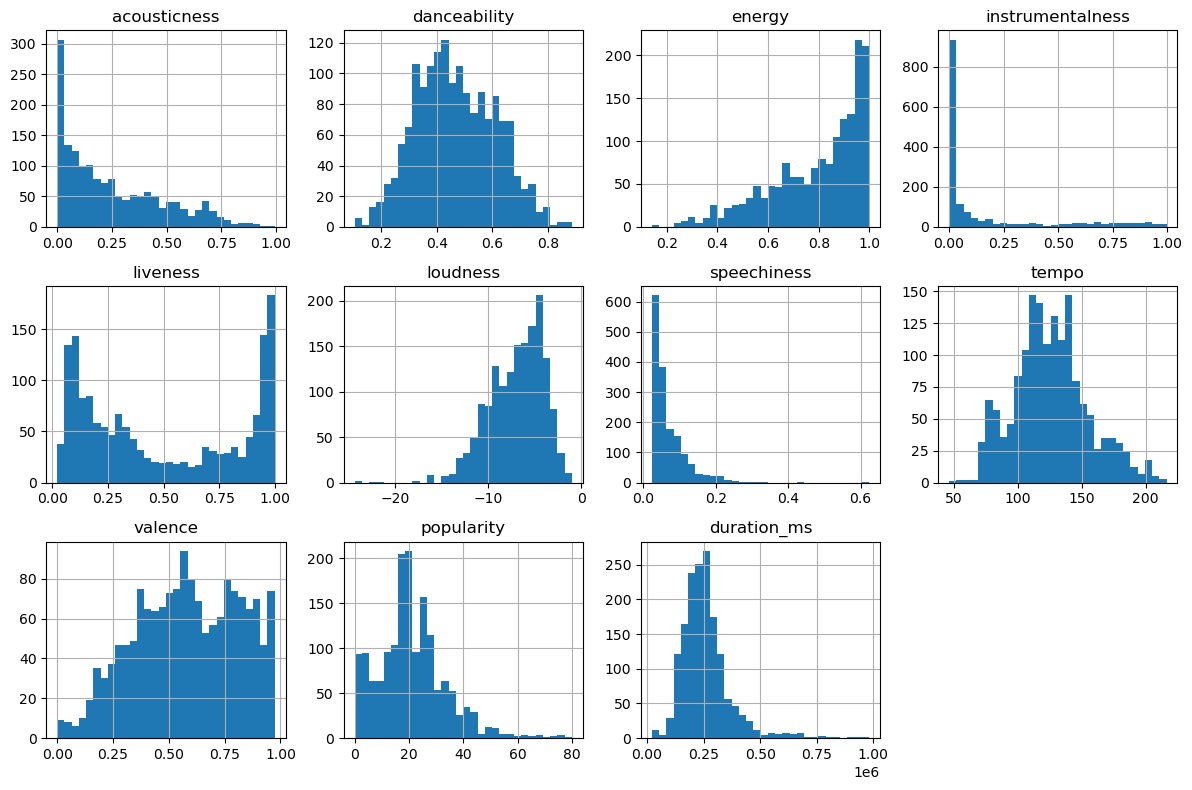

In [8]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    data[feature].hist(bins=30)
    plt.title(feature)
plt.tight_layout()
plt.show()

Removing outliers using z-score method for numeric features

In [10]:
from scipy import stats
z_scores = stats.zscore(data[numerical_features])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]

print("Cleaned dataset shape:", data.shape)

Cleaned dataset shape: (1508, 18)


Define popularity threshold

In [11]:
popularity_threshold = 70

Filter data for popular songs

In [17]:
popular_songs = data[data['popularity'] >= popularity_threshold]

Group by album and count the number of popular songs

In [18]:
popular_songs_per_album = popular_songs.groupby('album')['name'].count().sort_values(ascending=False)

Visualize the number of popular songs

In [20]:
if not popular_songs_per_album.empty:
    plt.figure(figsize=(12, 6))
    popular_songs_per_album.plot(kind='bar', color='skyblue')
    plt.title('Number of Popular Songs in Each Album')
    plt.xlabel('Album')
    plt.ylabel('Number of Popular Songs')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Recommend the top two albums with the highest number of popular songs
    top_two_albums = popular_songs_per_album.head(2)
    print("Top two recommended albums based on the number of popular songs:")
    print(top_two_albums)
else:
    print("No albums with popular songs found.")

No albums with popular songs found.


Perform exploratory data analysis to dive deeper into different features of songs and identify the pattern

In [21]:
import seaborn as sns

In [22]:
print(data.describe())

        Unnamed: 0  track_number  acousticness  danceability       energy  \
count  1508.000000   1508.000000   1508.000000   1508.000000  1508.000000   
mean    808.809019      8.696950      0.245424      0.472502     0.795082   
std     465.484079      6.633975      0.223472      0.141529     0.174163   
min       1.000000      1.000000      0.000009      0.104000     0.261000   
25%     406.750000      4.000000      0.055900      0.368000     0.675000   
50%     813.500000      7.000000      0.177000      0.463000     0.844000   
75%    1210.250000     11.000000      0.399000      0.582000     0.946000   
max    1609.000000     47.000000      0.914000      0.887000     0.999000   

       instrumentalness     liveness     loudness  speechiness        tempo  \
count       1508.000000  1508.000000  1508.000000  1508.000000  1508.000000   
mean           0.164306     0.486148    -6.855405     0.065277   125.655582   
std            0.276748     0.347234     2.775277     0.040164    29.

Distribution of Features

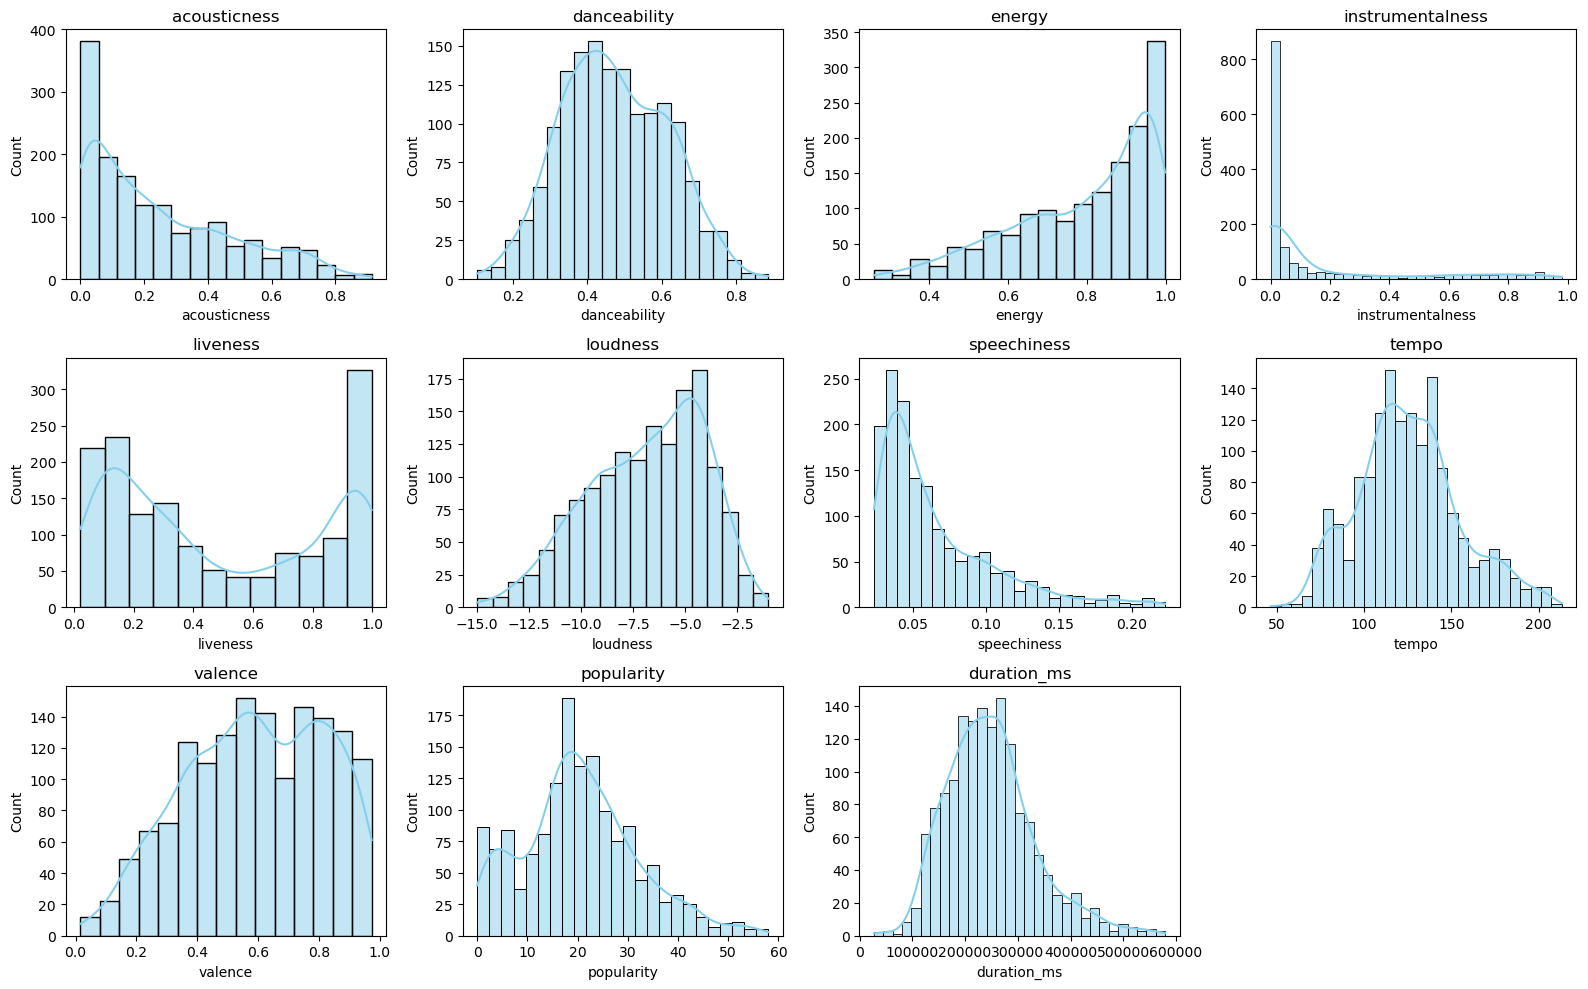

In [23]:
plt.figure(figsize=(16, 10))
for i, feature in enumerate(data.columns[7:], 1):  
    plt.subplot(3, 4, i)
    sns.histplot(data[feature], kde=True, color='skyblue')
    plt.title(feature)
plt.tight_layout()
plt.show()

Correlation Analysis

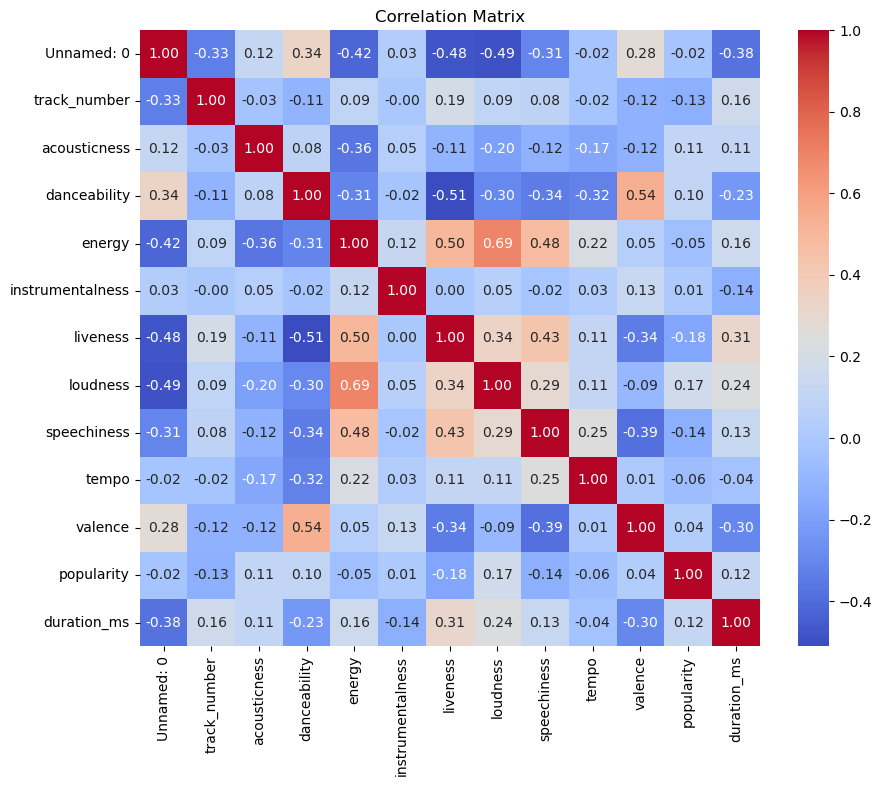

In [26]:
numeric_data = data.select_dtypes(include='number')

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Feature Relationships

C:\Users\sanje\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


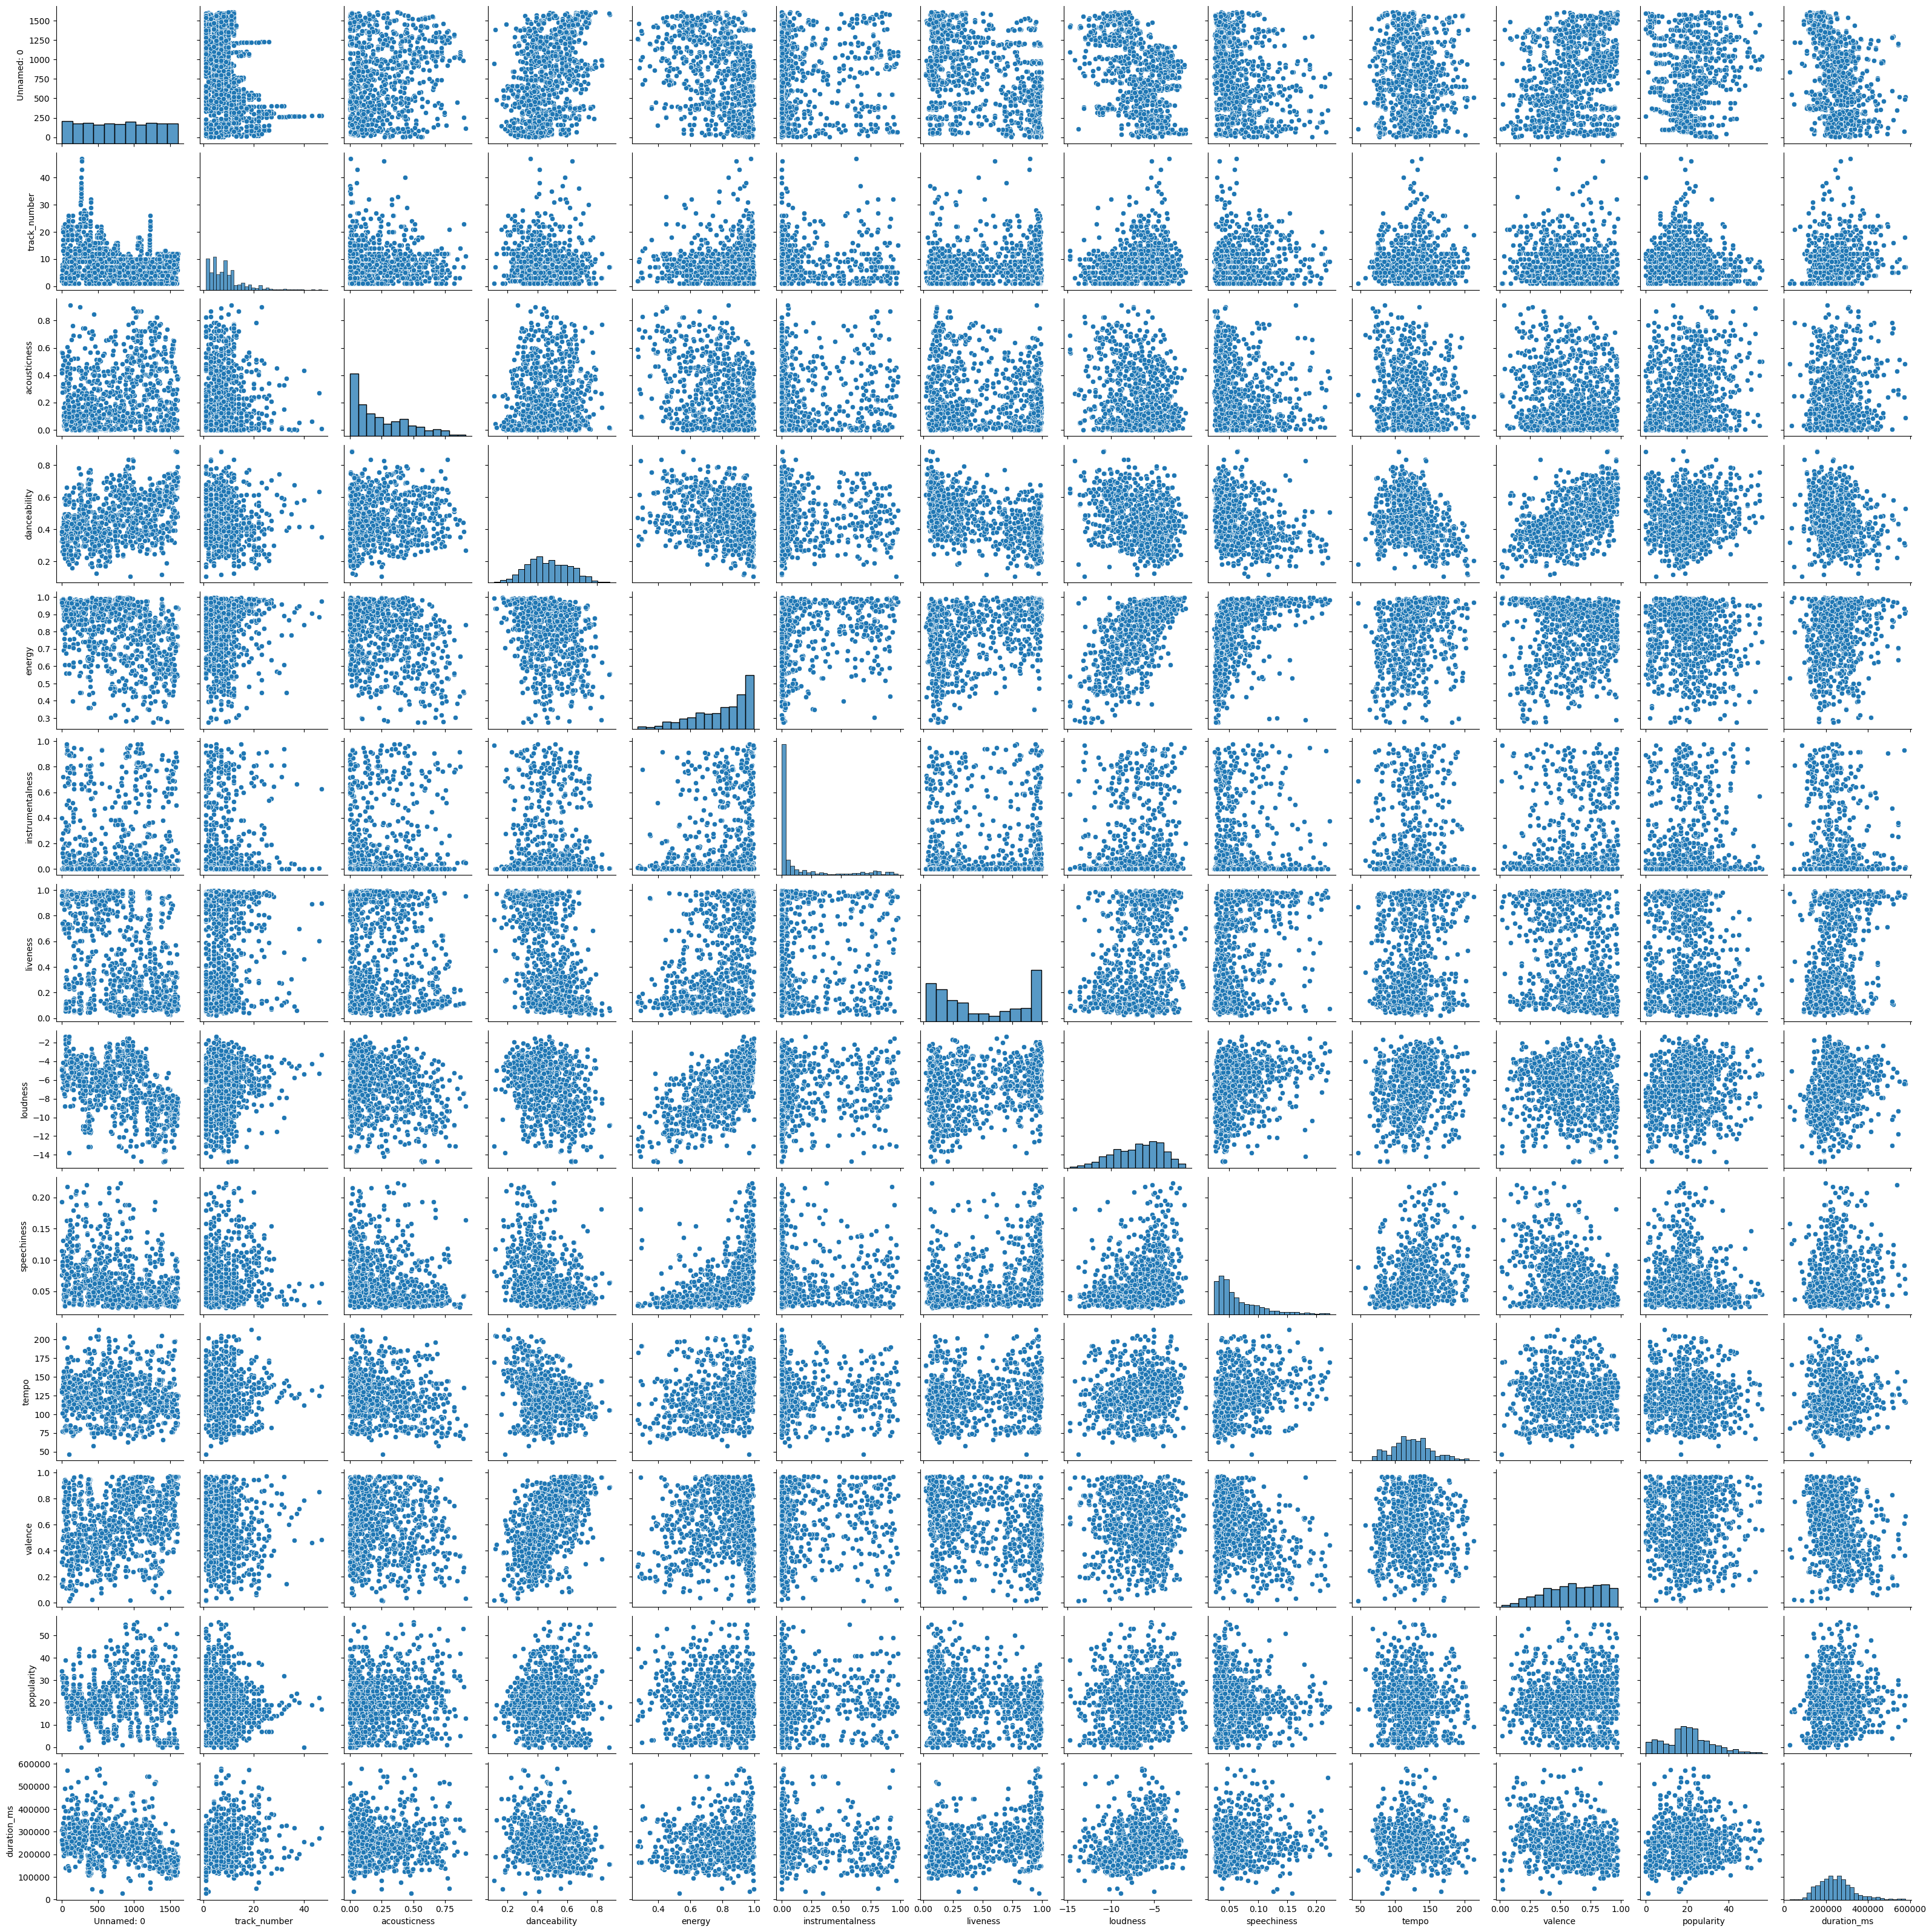

In [28]:
sns.pairplot(data.sample(n=1000))
plt.show()

Categorical Features

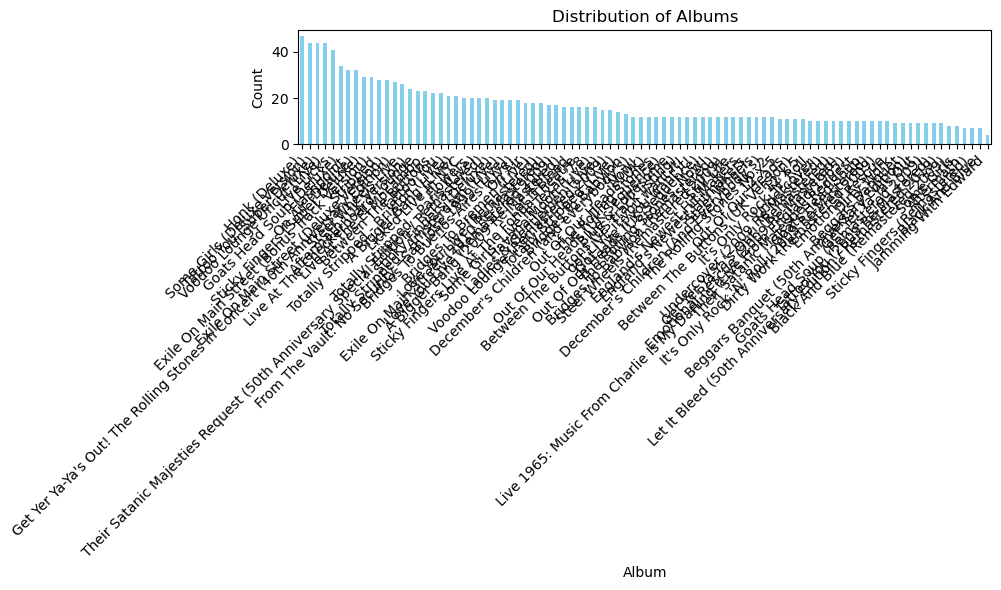

In [30]:
plt.figure(figsize=(10, 6))
data['album'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Albums')
plt.xlabel('Album')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Trends Over Time

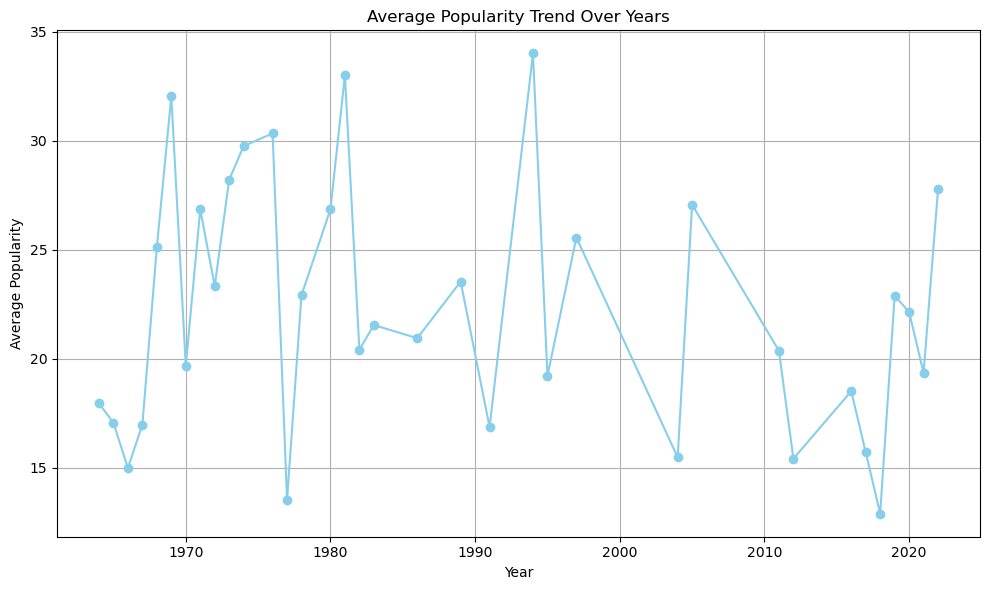

In [31]:
data['release_date'] = pd.to_datetime(data['release_date'])
plt.figure(figsize=(10, 6))
data.groupby(data['release_date'].dt.year)['popularity'].mean().plot(marker='o', color='skyblue')
plt.title('Average Popularity Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()

Feature Engineering

In [34]:
data['release_date'] = pd.to_datetime(data['release_date'])

data['release_decade'] = (data['release_date'].dt.year // 10) * 10

print(data[['release_date', 'release_decade']].head())

  release_date  release_decade
1   2022-06-10            2020
2   2022-06-10            2020
3   2022-06-10            2020
4   2022-06-10            2020
5   2022-06-10            2020


Discover how a song's popularity relates to various factors and how this has changed over time.

In [36]:
data['release_date'] = pd.to_datetime(data['release_date'])

#correlation between popularity and other factors
numeric_data = data.select_dtypes(include=['float64', 'int64'])  # Filter numeric columns
correlation_with_popularity = numeric_data.corr()['popularity'].sort_values(ascending=False)
print("Correlation of popularity with other factors:")
print(correlation_with_popularity)

Correlation of popularity with other factors:
popularity          1.000000
loudness            0.167845
duration_ms         0.116511
acousticness        0.105469
danceability        0.099812
valence             0.035501
instrumentalness    0.011834
Unnamed: 0         -0.023803
energy             -0.051860
tempo              -0.063744
track_number       -0.134124
speechiness        -0.135269
liveness           -0.180020
Name: popularity, dtype: float64


Correlation heatmap for top correlated factors

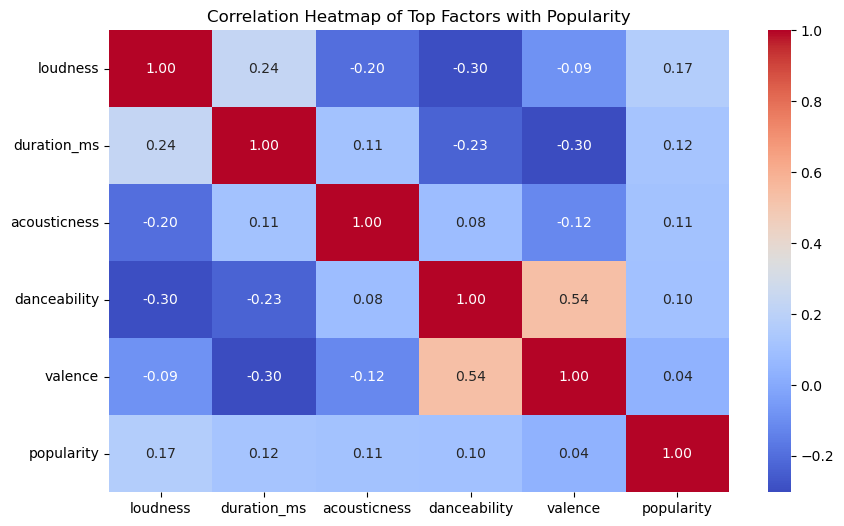

In [38]:
top_correlated_factors = correlation_with_popularity.index[1:6]  # Exclude popularity itself
plt.figure(figsize=(10, 6))
top_factors_with_popularity = top_correlated_factors.tolist() + ['popularity']
sns.heatmap(data[top_factors_with_popularity].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Top Factors with Popularity')
plt.show()

Analyze trends over time

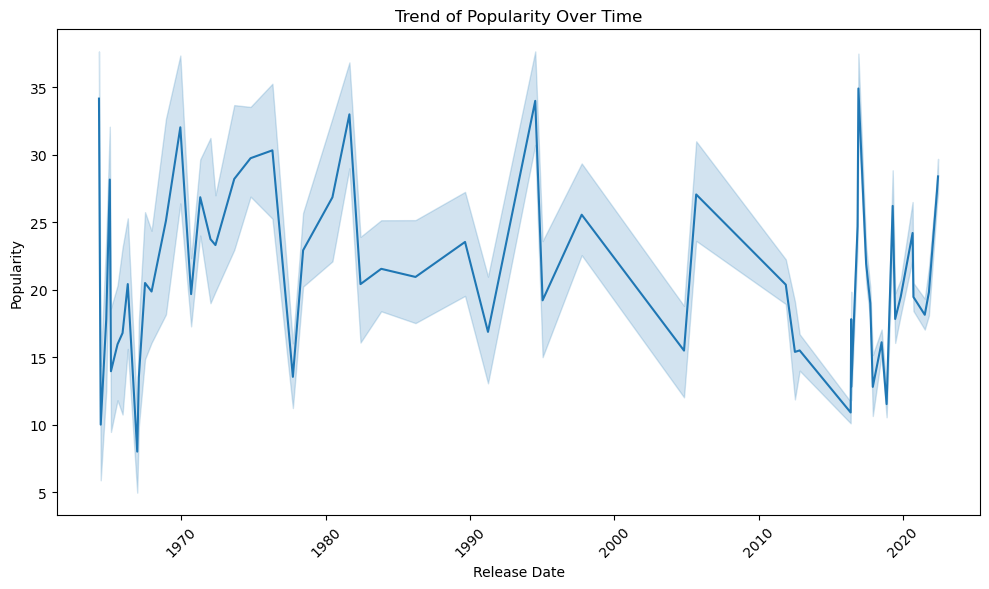

In [39]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='release_date', y='popularity', data=data)
plt.title('Trend of Popularity Over Time')
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Comment on the importance of dimensionality reduction techniques, share your ideas and explain your observations

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [41]:
# Select relevant numerical features 
numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Standardize the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_features])

# Apply PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)


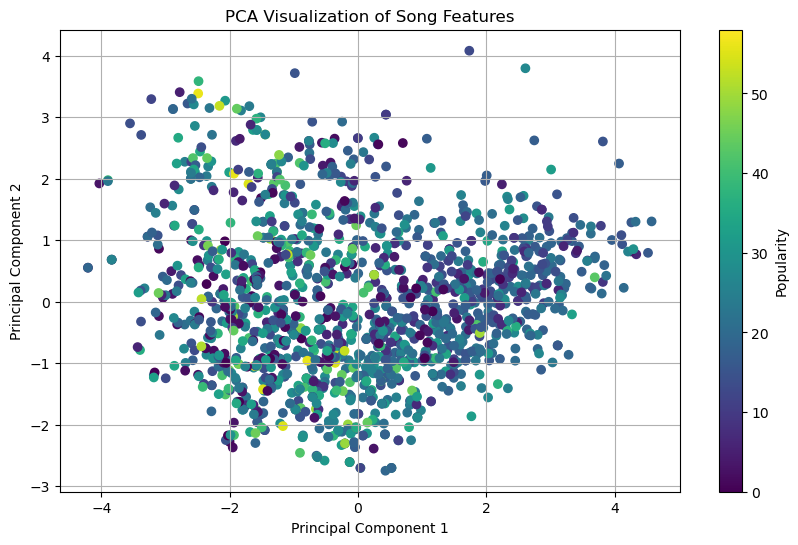

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data['popularity'], cmap='viridis')
plt.title('PCA Visualization of Song Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Popularity')
plt.grid(True)
plt.show()

1) High-dimensional datasets, like those in music recommendation systems such as Spotify, face the curse of dimensionality, causing sparsity and hindering visualization, analysis, and interpretation.
2) Computational complexity escalates with high dimensionality, impacting algorithms like clustering and classification; dimensionality reduction mitigates this burden while preserving data integrity.
3) Techniques like PCA and t-SNE enable visualization of high-dimensional data in lower-dimensional spaces, facilitating interpretation without losing data structure.
4) Noise reduction is achieved by filtering out irrelevant features through dimensionality reduction, enhancing machine learning model performance.
5) Dimensionality reduction serves as feature engineering, compacting data representations to capture essential information for downstream tasks.
6) Simplified, more interpretable models with better generalization are achieved through dimensionality reduction while retaining critical data aspects.
7) Collinearity and overfitting, common in high-dimensional datasets, are mitigated by removing redundant features and capturing data structure effectively.
8) In music recommendation systems like Spotify, dimensionality reduction aids in processing and analyzing vast audio and metadata, identifying patterns for improved recommendations.
9) PCA and t-SNE can pinpoint significant audio features and visualize song similarities, enhancing recommendation accuracy.

Overall, dimensionality reduction is crucial in dealing with high-dimensional data, enhancing efficiency, visualization, noise reduction, and model performance in data science tasks.

CLUSTER ANALYSIS

In [45]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Standardize the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_features])

In [46]:
# Determine the optimal number of clusters
sse = []
silhouette_scores = []
for k in range(2, 11):  # Test cluster sizes from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

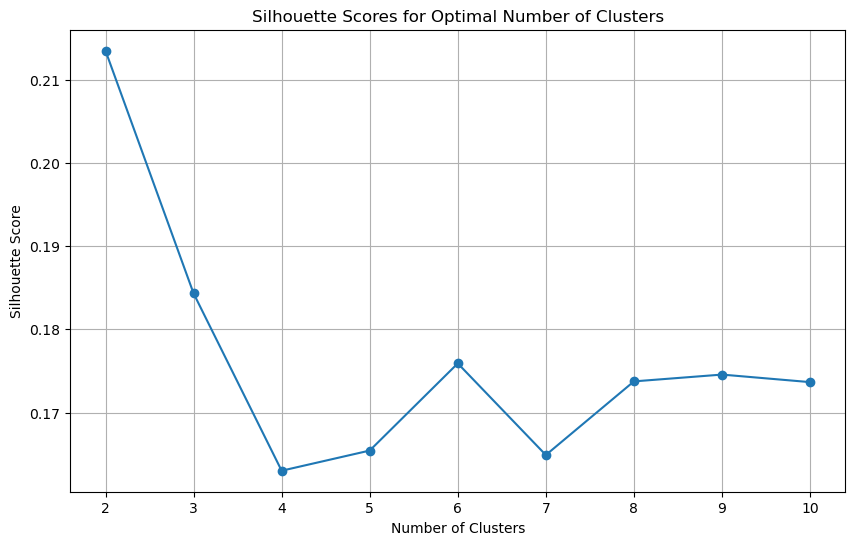

In [47]:
# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

Use appropriate clustering algorithm

In [48]:
# Select relevant numerical features
numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Standardize the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_features])

# Determine the optimal number of clusters
silhouette_scores = []
for k in range(2, 11):  # Test cluster sizes from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

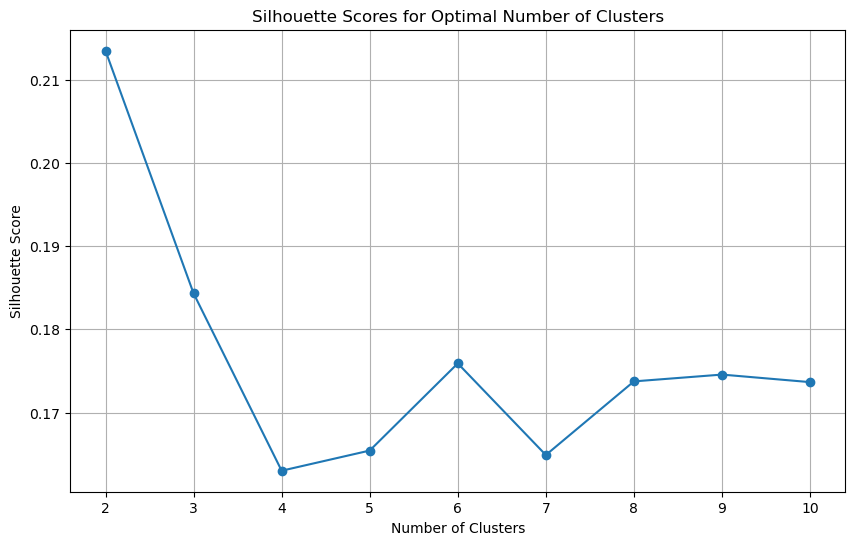

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

Cluster on Feature based

In [50]:
optimal_num_clusters = 4 

kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels 
data['cluster_label'] = kmeans.labels_

# Group the data by cluster label and calculate the mean of each numerical feature
cluster_means = data.groupby('cluster_label')[numerical_features].mean()

print("Cluster Means:")
print(cluster_means)

Cluster Means:
               acousticness  danceability    energy  instrumentalness  \
cluster_label                                                           
0                  0.180885      0.494300  0.887947          0.226044   
1                  0.482336      0.453790  0.584797          0.067617   
2                  0.178388      0.347717  0.936061          0.160011   
3                  0.211201      0.612636  0.682219          0.172814   

               liveness  loudness  speechiness       tempo   valence  
cluster_label                                                         
0              0.459271 -5.059924     0.051389  124.297281  0.729812  
1              0.345422 -8.585158     0.044299  111.838759  0.409261  
2              0.836765 -5.239105     0.108265  139.844283  0.419607  
3              0.209535 -9.619730     0.047589  121.512139  0.783227  


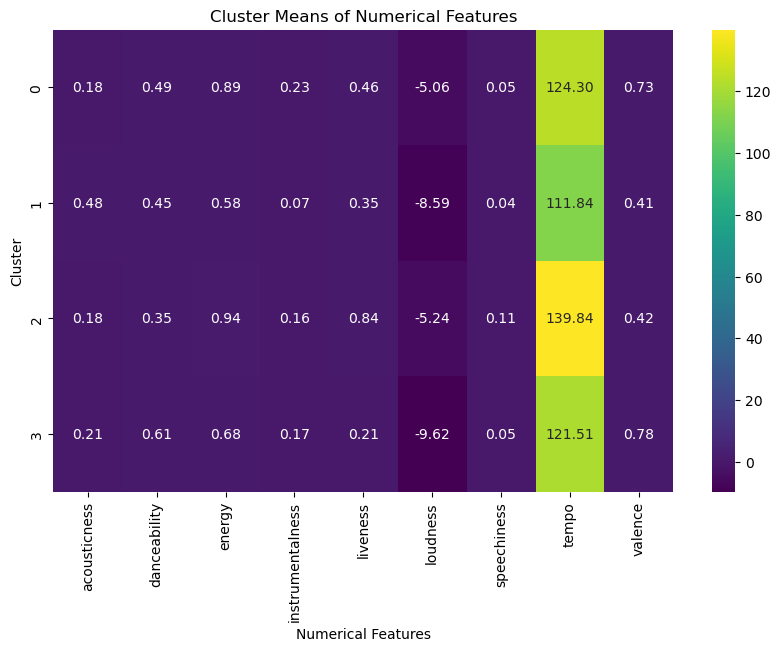

In [51]:
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, cmap='viridis', annot=True, fmt=".2f")
plt.title('Cluster Means of Numerical Features')
plt.xlabel('Numerical Features')
plt.ylabel('Cluster')
plt.show()